### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

#### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2020

Búsqueda y Recomendación de Textos Legales - Análisis y Curación de Datos

Mentor: Claudio Sarate

Integrantes:
* Clara Quintana
* Ezequiel Juarez
* David Veisaga
* Jorge Pérez 

### Práctico de Introducción al Aprendizaje Automático

El objetivo de este práctico es desarrollar distintos modelos de clasificación para poder evaluar la performance y la exactitud de predicción de cada modelo.

### Requisitos iniciales

El corpus debe estar ya depurado y debe poseer una columna con clases definidas previamente.

Nota: es importante que la cantidad de las distintas clases sea medianamente balanceada para que el entrenamiento sea lo mas eficiente posible.

In [52]:
import sys
import pandas
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics

In [2]:
# Se verfica entorno de ejecución
in_colab = "google.colab" in sys.modules

if in_colab:
    from google.colab import drive

    drive.mount("/content/drive")
    BASE_DIR = "/content/drive/My Drive/Diplo2020 Mentoria/"
else:
    BASE_DIR = "../"

In [3]:
train_data = BASE_DIR + "corpus3.csv"
dataset = pandas.read_csv(train_data)
dataset.head()

,Unnamed: 0,TEXTO,DOCUMENTO,TIPO
0,0,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 001-2018 COOPI C MUN CAR...,AUTO
1,1,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 002-2018 Denuncia R R RA...,AUTO
2,2,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 003-2018 VEDIA FLORES Cr...,AUTO
3,3,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 004-2018 FERNANDEZ Favio...,AUTO
4,4,sala electoral comp.originaria tribunal superi...,../Datos/Electoral//A 005-2018 ATANOR ADI ref.pdf,AUTO


In [4]:
dataset['TIPO'].value_counts()

AUTO         125
SENTENCIA     25
Name: TIPO, dtype: int64

### Enunciado del práctico

 ----------------------------------------------------------------------------------------------------------

Transformar el texto en vectores numéricos utilizando scikit-learn. Los procesos de vectorización, clasificación y evaluación de performance pueden ser hechos paso a paso o mediante el uso de pipelines para mayor eficiencia.

Scikit-learn ofrece 3 modelos de vectorización:

* *CountVectorizer*: Convert a collection of text documents to a matrix of token counts
* *TfidfVectorizer*: Convert a collection of raw documents to a matrix of TF-IDF features.
*  *HashingVectorizer*: Convert a collection of text documents to a matrix of token occurrences

Comparamos los 3 modelos usando el primer documento del corpus.

In [ ]:
# Texto del primer documento
texto = dataset[0:1].TEXTO

*CountVectorizer*

El recuento de palabras es un buen punto de partida, pero es muy básico. Un problema con los recuentos simples es que algunas palabras como “testamento” aparecerán muchas veces y sus recuentos grandes no serán muy significativos en los vectores codificados.

In [ ]:
vectorizer_1 = CountVectorizer()

In [ ]:
# tokenizar y construir el vocabulario
vectorizer_1.fit(texto)

In [ ]:
# resumen
print(vectorizer_1.vocabulary_)

In [ ]:
# codificador de documentos
vector_1 = vectorizer_1.transform(texto)

In [ ]:
# resumir vector codificado
print(vector_1.shape)
print(type(vector_1))
print(vector_1.toarray())

*TfidfVectorizer*

TF-IDF es un acrónimo que significa Frecuencia de Término – Frecuencia Inversa de Documento que son los componentes de las puntuaciones resultantes asignadas a cada palabra.

* **Término Frecuencia**: Esto resume la frecuencia con la que una palabra dada aparece dentro de un documento.
* **Frecuencia inversa de documentos**: Esto reduce la escala de las palabras que aparecen mucho en los documentos.

El peso que tiene cada palabra ($w_i,_j$) es directamente proporcional a las veces que aparece en el documento ($tf_i,_j$) e inversamente proporcional a las veces que aparece en todos los documentos ($df_i$).

$$ w_i,_j = tf_i,_j * log \frac{N}{df_i} $$

$tf_i,_j$ Frecuencia de la palabra $i$ en el documento $j$.

$df_i$ Número de documentos que contienen la palabra $i$.

$N$ Número total de documentos.


TF-IDF son puntuaciones de frecuencia de palabras que tratan de resaltar las palabras que son más interesantes, por ejemplo, frecuentes en un documento pero no en todos los documentos.

Los recuentos y las frecuencias pueden ser muy útiles, pero una limitación de estos métodos es que el vocabulario puede llegar a ser muy amplio. Esto, a su vez, requerirá grandes vectores para codificar los documentos e impondrá grandes requisitos a la memoria y a los algoritmos de ralentización. 

In [ ]:
vectorizer_2 = TfidfVectorizer()

In [ ]:
# tokenizar y construir el vocabulario
vectorizer_2.fit(texto)

In [ ]:
# resumir
print(vectorizer_2.vocabulary_)
print(vectorizer_2.idf_)

In [ ]:
# documento codificado
vector_2 = vectorizer_2.transform(texto)

In [ ]:
# resumir vector codificado
print(vector_2.shape)
print(vector_2.toarray())

*HashingVectorizer*

Podemos usar un hash de palabras para convertirlas en números enteros. La ventaja de esto, es que permite no tener vocabulario y poder elegir un vector de longitud fija arbitraria. Una desventaja es que el hash es una función unidireccional, por lo que no hay forma de volver a convertir la codificación en una palabra.

La clase HashingVectorizer implementa este enfoque que se puede utilizar para convertir palabras en hash de forma coherente y, a continuación, convertir en token y codificar documentos según sea necesario.

In [ ]:
vectorizer_3 = HashingVectorizer(n_features=300)

In [ ]:
# documento codificado
vector_3 = vectorizer_3.transform(texto)

In [ ]:
# resumir vector codificado
print(vector_3.shape)
print(vector_3.toarray())

Al ejecutar el ejemplo se codifica el documento de muestra como una matriz dispersa de 300 elementos. Los valores del documento codificado corresponden a recuentos de palabras normalizados por defecto en el rango de -1 a 1, pero se pueden hacer recuentos enteros simples cambiando la configuración por defecto.

De los 3 métodos posibles utilizaremos TfidfVectorizer

### Dividir los datos en entrenamiento y validación con un procentaje de 70% para entrenamiento y 30% para validación con shuffle, seleccionar las features X e Y. 

In [5]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(dataset['TEXTO'])

<150x19220 sparse matrix of type '<class 'numpy.float64'>'
	with 204569 stored elements in Compressed Sparse Row format>

In [6]:
# División entre instancias vectorizadas y etiquetas
X, y = vectorizer.transform(dataset["TEXTO"]), dataset["TIPO"]

In [7]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

 ----------------------------------------------------------------------------------------------------------

### Clasificar utilizando los datos de entrenamiento mediante Logistic Regresion, Naive Bayes, Random Forest y SVM.

In [43]:
def get_metricas(titulo, y_train, y_train_pred, y_test, y_test_pred):
    print(titulo)
    print('-' * len(titulo))

    # Datos de Evaluación
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_pred).ravel()
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred, average="macro")
    recall = metrics.recall_score(y_test, y_test_pred, average="macro")
    f1 = metrics.f1_score(y_test, y_test_pred, average="macro")

    print('\nEvaluación')
    print('\nReporte de Clasificiación:\n', metrics.classification_report(y_test, y_test_pred))
    print(f'Accuracy:{accuracy:{0.2}}')
    print(f'Precision:{precision:{0.2}}')
    print(f'Recall:{recall:{0.2}}')
    print(f'F1 score:{f1:{0.2}}')
        
    return tp, fp, tn, fn, accuracy, precision, recall, f1

Defino una función para entrenar e imprimer métricas de cada uno de los modelos a comparar. 

* Los parámetros de entrada son los datos de entrenaimiento y evaluación.

* Los parámetros de salida son las métricas de los datos de evaluación.


In [44]:
def entreno_modelo(titulo, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
   
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    

    tp, fp, tn, fn, accuracy, precision, recall, f1 = get_metricas(titulo, y_train, y_train_pred, y_test, y_test_pred)
    
    print('\nMatriz de Confusión')
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.show()

    return tp, fp, tn, fn, accuracy, precision, recall, f1

 ----------------------------------------------------------------------------------------------------------

### Realizar las predicciones para cada caso generando la matriz de confusión (plotear) y los reportes de performance con valores para precision, recall, f1-score y support.

Guardaremos las metrícas en la siguiente variable:

In [45]:
model_list = []

Logistic Regretion
------------------

Evaluación

Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.95      1.00      0.97        39
   SENTENCIA       1.00      0.67      0.80         6

    accuracy                           0.96        45
   macro avg       0.98      0.83      0.89        45
weighted avg       0.96      0.96      0.95        45

Accuracy:0.96
Precision:0.98
Recall:0.83
F1 score:0.89

Matriz de Confusión


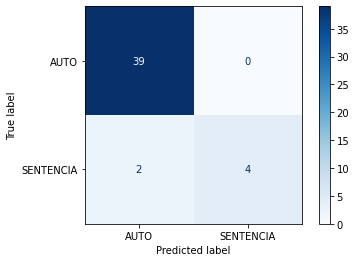

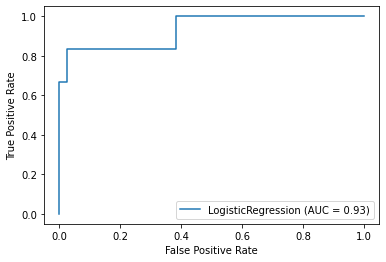

In [46]:
# Entreno con Logistic Regretion
tp, fp, tn, fn, accuracy, precision, recall, f1 = entreno_modelo('Logistic Regretion', LogisticRegression(solver='lbfgs'), X_train, y_train, X_test, y_test)
model_list.append(['Logistic Regretion', tp, fp, tn, fn, accuracy, precision, recall, f1])

Naive Bayes
-----------

Evaluación

Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.87      1.00      0.93        39
   SENTENCIA       0.00      0.00      0.00         6

    accuracy                           0.87        45
   macro avg       0.43      0.50      0.46        45
weighted avg       0.75      0.87      0.80        45

Accuracy:0.87
Precision:0.43
Recall:0.5
F1 score:0.46

Matriz de Confusión


C:\Users\jperezv\Anaconda3\envs\mentoria\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jperezv\Anaconda3\envs\mentoria\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


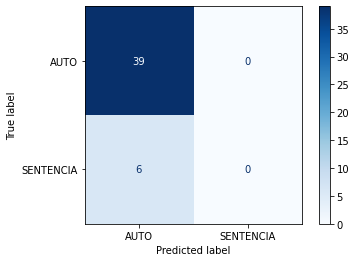

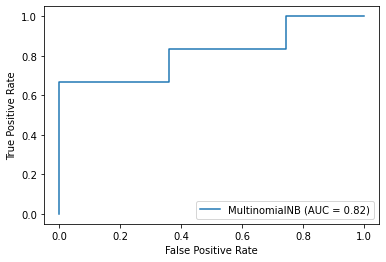

In [47]:
# Entreno con Naive Bayes
tp, fp, tn, fn, accuracy, precision, recall, f1 = entreno_modelo('Naive Bayes', MultinomialNB(), X_train, y_train, X_test, y_test)
model_list.append(['Naive Bayes', tp, fp, tn, fn, accuracy, precision, recall, f1])

Random Forest
-------------

Evaluación

Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.95      1.00      0.97        39
   SENTENCIA       1.00      0.67      0.80         6

    accuracy                           0.96        45
   macro avg       0.98      0.83      0.89        45
weighted avg       0.96      0.96      0.95        45

Accuracy:0.96
Precision:0.98
Recall:0.83
F1 score:0.89

Matriz de Confusión


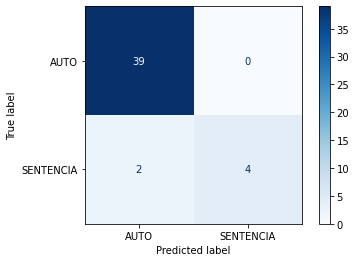

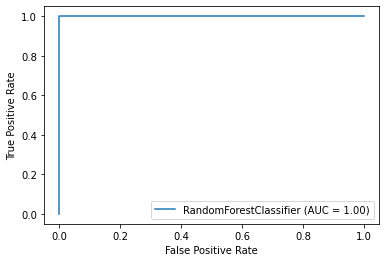

In [48]:
# Entreno con Random Forest
tp, fp, tn, fn, accuracy, precision, recall, f1 = entreno_modelo('Random Forest',ensemble.RandomForestClassifier(random_state=0), X_train, y_train, X_test, y_test)
model_list.append(['Random Forest', tp, fp, tn, fn, accuracy, precision, recall, f1])

SVM
---

Evaluación

Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.95      1.00      0.97        39
   SENTENCIA       1.00      0.67      0.80         6

    accuracy                           0.96        45
   macro avg       0.98      0.83      0.89        45
weighted avg       0.96      0.96      0.95        45

Accuracy:0.96
Precision:0.98
Recall:0.83
F1 score:0.89

Matriz de Confusión


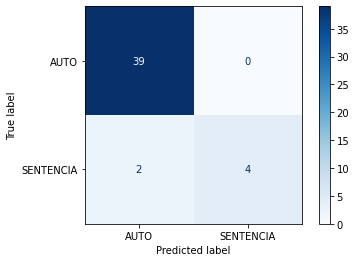

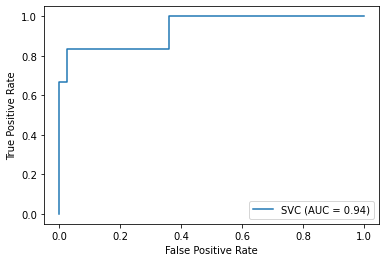

In [49]:
# Entreno con SVM
tp, fp, tn, fn, accuracy, precision, recall, f1 = entreno_modelo('SVM', svm.SVC(), X_train, y_train, X_test, y_test)
model_list.append(['SVM', tp, fp, tn, fn, accuracy, precision, recall, f1])

 ----------------------------------------------------------------------------------------------------------

### Determinar el modelo con mejor performance.

In [50]:
df = pandas.DataFrame(model_list, columns=['modelo', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'f1'])
df.sort_values(by='accuracy', ascending=False)

,modelo,tp,fp,tn,fn,accuracy,precision,recall,f1
0,Logistic Regretion,4,0,39,2,0.955556,0.975610,0.833333,0.887500
2,Random Forest,4,0,39,2,0.955556,0.975610,0.833333,0.887500
3,SVM,4,0,39,2,0.955556,0.975610,0.833333,0.887500
1,Naive Bayes,0,0,39,6,0.866667,0.433333,0.500000,0.464286


El modelo Naive Base no predijo ninguna Sentencia.
Los otros 3 modelos obtuvieron la misma performance. 

 ----------------------------------------------------------------------------------------------------------

### Probar con y sin shuffle en la partición de los datos.

In [27]:
# división entre entrenamiento y evaluación sin mezclar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [29]:
entreno_modelo('Logistic Regretion', LogisticRegression(solver='lbfgs'), X_train, y_train, X_test, y_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'AUTO'

In [30]:
entreno_modelo('Naive Bayes', MultinomialNB(), X_train, y_train, X_test, y_test)

Naive Bayes
-----------


ValueError: not enough values to unpack (expected 4, got 1)

Al estar la muestra ordenada, si no se aplica un shuffle en la división de datos entre entrenamiento y evaluación, al entrenar un modelo se produce un error por tener solo datos de una sola clase.

### Probar con distintos hiperparámetros para ver si los resultados cambian de acuerdo a si los datos se han mezclado al entrenar y validar o no.

In [31]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [54]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'classifier__C' : np.logspace(-4, 4, 50),
     'classifier__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'classifier__max_iter' : [10,30,50,100,300,500,1000,2500,5000,10000]
    },
    {'classifier' : [MultinomialNB()],
     'classifier__alpha': np.logspace(-50,50, 500)
    },
    {'classifier' : [ensemble.RandomForestClassifier()],
     'classifier__n_estimators' : [320,330,340],
     'classifier__max_depth' : [8, 9, 10, 11, 12]
    },
    {'classifier' : [svm.SVC()],
     'classifier__kernel': ['rbf','linear'], 
     'classifier__gamma': [1e-3, 1e-4],
     'classifier__C': [1, 10, 100, 1000]
    },
]

In [70]:
param_grid = [
    {'classifier' : [ensemble.RandomForestClassifier()],
     'classifier__n_estimators' : list(range(10,101,10)),
     'classifier__max_depth' : [8, 9, 10, 11, 12]
    },
]

In [71]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , ensemble.RandomForestClassifier())])

In [72]:
model = SGDClassifier(random_state=0)
cv = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy')
cv.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   29.0s finished


In [73]:
results = cv.cv_results_
df = pandas.DataFrame(results)

In [74]:
pandas.options.display.max_colwidth = 200
df.sort_values(['mean_test_score','std_test_score','rank_test_score'],
               ascending = [False,True,True],
               inplace=True)
df.reset_index(drop=True,inplace=True)
df[['params','mean_test_score','std_test_score','rank_test_score']].head(20)

,params,mean_test_score,std_test_score,rank_test_score
0,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 8, 'classifier__n_estimators': 40}",0.904762,0.052164,1
1,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 8, 'classifier__n_estimators': 60}",0.904762,0.052164,1
2,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 8, 'classifier__n_estimators': 80}",0.904762,0.052164,1
3,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 8, 'classifier__n_estimators': 90}",0.904762,0.052164,1
4,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 8, 'classifier__n_estimators': 100}",0.904762,0.052164,1
5,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 9, 'classifier__n_estimators': 20}",0.904762,0.052164,1
6,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 9, 'classifier__n_estimators': 60}",0.904762,0.052164,1
7,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 9, 'classifier__n_estimators': 90}",0.904762,0.052164,1
8,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 9, 'classifier__n_estimators': 100}",0.904762,0.052164,1
9,"{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40), 'classifier__max_depth': 10, 'classifier__n_estimators': 40}",0.904762,0.052164,1


Seleccionamos la mejor configuración de hyper parámetros.

In [75]:
best_model = df.loc[df['rank_test_score'].idxmin()]['params']
best_model

{'classifier': RandomForestClassifier(max_depth=8, n_estimators=40),
 'classifier__max_depth': 8,
 'classifier__n_estimators': 40}

In [76]:
model = ensemble.RandomForestClassifier(max_depth=8, n_estimators=320)
classifier = model.fit(X_train, y_train)

Mejor Modelo
------------

Evaluación

Reporte de Clasificiación:
               precision    recall  f1-score   support

        AUTO       0.97      1.00      0.99        39
   SENTENCIA       1.00      0.83      0.91         6

    accuracy                           0.98        45
   macro avg       0.99      0.92      0.95        45
weighted avg       0.98      0.98      0.98        45

Accuracy:0.98
Precision:0.99
Recall:0.92
F1 score:0.95

Matriz de Confusión


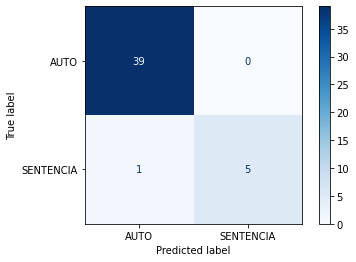

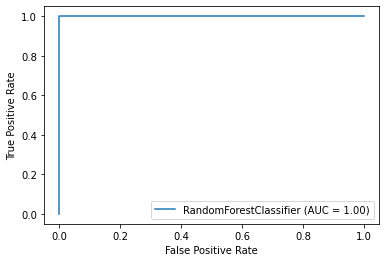

(5,
 0,
 39,
 1,
 0.9777777777777777,
 0.9875,
 0.9166666666666667,
 0.9482163406214039)

In [77]:
entreno_modelo('Mejor Modelo', model, X_train, y_train, X_test, y_test)

 ----------------------------------------------------------------------------------------------------------

## Conclusiones

Al estar la muestra ordenada, si no se aplica un shuffle en la división de datos entre entrenamiento y evaluación, al entrenar un modelo se produce un error por tener solo datos de una sola clase.

Si entrenamos los modelos con los hiperparámetros por defecto, detectamos que el modelo Naive Bayes no reconoció ninguna sentencia. Hubo que cambiar el hiperparámetros alpha para que el modelo prediga sentencias.

Al tener pocos datos y modificando hiperparámetros, todos modelos obtuvieron como mejor accuracy un 96 %. A su vez todos obtuvieron las mismas métricas en los valores de test, incluido el F1 (es el que hubiéramos elegido para comparar). Esto no nos permite definir cual es el mejor modelo a utilizar.

Las curvas ROC nos dice que tan bueno es el modelo para predecir entre dos clases. Compara la sensibilidad con la especificidad. 
* La sensibilidad, o Recall, es la proporción de las predicciones positivas sobre el total de los valores reales positivos. 
    
    $$ \frac{TP}{TP + FN} $$
    
* La especificidad, es el porcentaje de falsos positivos.

    $$ \frac{TN}{TN + FP} $$


El modelo de Random Forest obtuvo un AUC (Area bajo la Curva ROC) de 1, siendo un puntaje perfecto.

 ----------------------------------------------------------------------------------------------------------

### Entrega

Formato de entrega: Deberán utilizar esta notebook con los códigos con los que hicieron el análisis y los anaálisis y conclusiones despues de cada proceso. 

Fecha de entrega: 16/8

 ----------------------------------------------------------------------------------------------------------